In [1]:
import wfdb #waveform database 
from wfdb import processing
import os
import glob as gb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import signal
from sklearn.model_selection import train_test_split #to split data
import pywt #pywavelet lib
from sklearn import preprocessing
%matplotlib inline
from keras import models,layers
from keras.layers import SimpleRNN, Dense, Dropout , LSTM
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
record_name='european-st-t-database-1.0.0/european-st-t-database-1.0.0/e0103'

In [3]:
folder_path = 'european-st-t-database-1.0.0/european-st-t-database-1.0.0'
file_paths = gb.glob(folder_path + '/*.atr')
file_paths = [os.path.splitext(path)[0].replace("\\", "/") for path in file_paths]

In [4]:
record=wfdb.rdrecord(record_name)
print(record.__dict__)

{'record_name': 'e0103', 'n_sig': 2, 'fs': 250, 'counter_freq': None, 'base_counter': None, 'sig_len': 1800000, 'base_time': None, 'base_date': None, 'comments': ['Age: 62  Sex: M', 'Mixed angina', '1-vessel disease (RCA)', 'Medications: nitrates, diltiazem', 'Recorder type: ICR 7200'], 'sig_name': ['V4', 'MLIII'], 'p_signal': array([[0.455, 3.755],
       [0.46 , 3.78 ],
       [0.45 , 3.765],
       ...,
       [0.535, 3.91 ],
       [0.54 , 3.87 ],
       [0.53 , 3.865]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['e0103.dat', 'e0103.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [0, 0], 'units': ['mV', 'mV'], 'adc_res': [12, 12], 'adc_zero': [0, 0], 'init_value': [91, 751], 'checksum': [56457, 48959], 'block_size': [0, 0]}


In [5]:
ecg_signal,_=wfdb.rdsamp(record_name)
print(len(ecg_signal))

1800000


In [6]:
annotation=wfdb.rdann(record_name,'atr')
print(annotation.__dict__)

{'record_name': 'e0103', 'extension': 'atr', 'sample': array([     15,      43,     263, ..., 1799410, 1799650, 1799902],
      dtype=int64), 'symbol': ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N

Text(0.5, 1.0, 'Original ECG Signal')

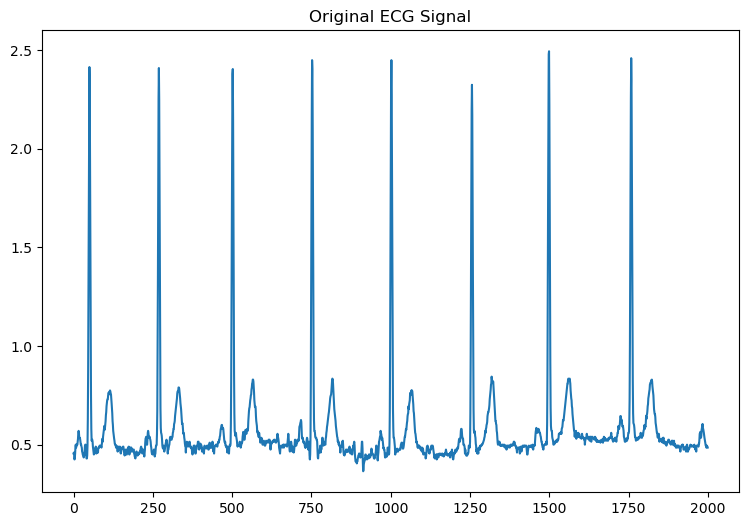

In [7]:
plt.figure(figsize=(9,6))
plt.plot(ecg_signal[0:2000,0])
plt.title('Original ECG Signal')

In [8]:

    # Apply wavelet transform
    wavelet = 'db6'  # Choose the desired wavelet
    coeffs = pywt.wavedec(ecg_signal, wavelet) #decomposing signal 

    # Set a threshold for noise removal
    threshold = 0.5  # Adjust according to your signal characteristics

    # Apply thresholding to remove noise
    denoised_coeffs = [pywt.threshold(c, threshold) for c in coeffs]

    # Reconstruct the denoised signal
    denoised_signals = pywt.waverec(denoised_coeffs, wavelet)

Text(0.5, 1.0, 'ECG_denoised_signals')

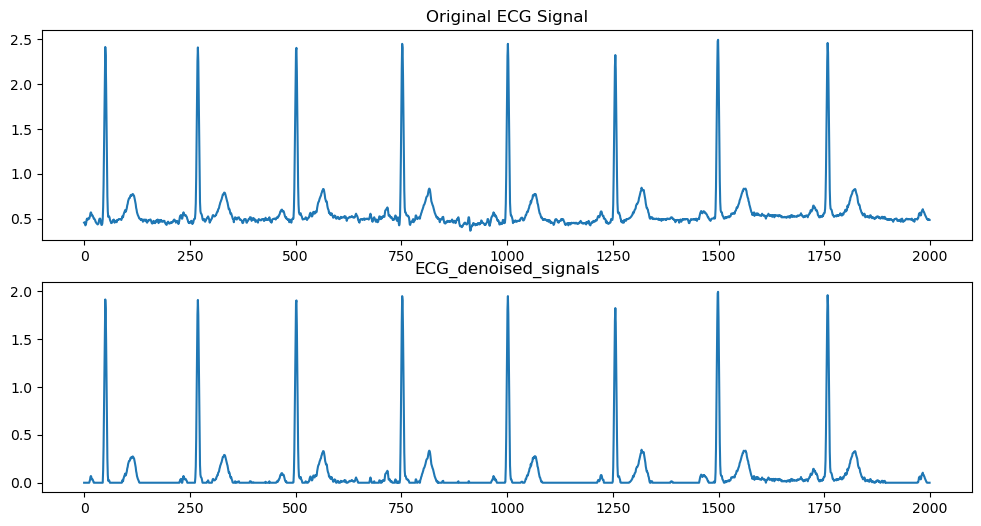

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.plot(ecg_signal[:2000,0])
plt.title('Original ECG Signal')
plt.subplot(2, 1, 2)
plt.plot(denoised_signals[0:2000,0])
plt.title('ECG_denoised_signals')

In [10]:
normalize_signal=(ecg_signal-np.mean(ecg_signal))/np.std(ecg_signal)

Text(0.5, 1.0, 'ECG_Normalized_signals')

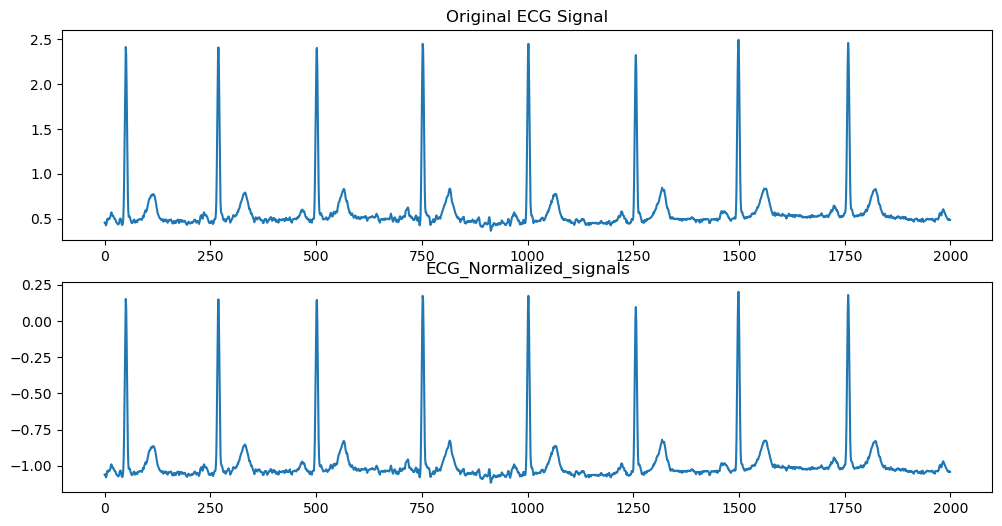

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.plot(ecg_signal[:2000,0])
plt.title('Original ECG Signal')
plt.subplot(2, 1, 2)
plt.plot(normalize_signal[:2000,0])
plt.title('ECG_Normalized_signals')

In [12]:
# Read the ECG signal and annotation file using the wfdb library
annotation = wfdb.rdann(record_name, 'atr', sampfrom=0, sampto=record.sig_len)

# Get the indices of the QRS complexes (peaks)
qrs_inds = annotation.sample

# Define the duration (in samples) for each beat segment
beat_duration = int(0.2 * record.fs)  # Assuming a 200 ms duration for each beat

# Split the ECG signal into individual beats
beats = []
for qrs_ind in qrs_inds:
    start = max(0, qrs_ind - beat_duration // 2)  # Start of the beat segment
    end = min(qrs_ind + beat_duration // 2, record.sig_len)  # End of the beat segment
    beat = record.p_signal[start:end,0]  # Extract the beat segment
    beat=beat.tolist()
    if len(beat)<50:
        a=min(beat)
        for i in range(50-len(beat)):
            beat.append(a)
    beats.append(beat)
    beat=[]

In [13]:
beats=np.array(beats)

In [14]:
annotation_symbols=annotation.symbol

In [15]:
my_set_labels=set(annotation_symbols)
my_set_numbers=set(range(len(my_set_labels)))
my_dic = dict(zip(my_set_labels,my_set_numbers))
converted_list = np.array([my_dic.get(item, item) for item in annotation_symbols])

In [16]:
X_train,X_test,Y_train , Y_test = train_test_split(beats , converted_list , test_size=0.3 ,random_state=42 )
X_test, X_valid,Y_test ,Y_valid = train_test_split(X_test,Y_test , test_size=0.5 ,random_state=42 )

# MODELS

In [17]:
model = models.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1],)),  # Flatten the 2D input array
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='relu')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=1)

Epoch 1/10


C:\Users\Toqa\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5135/5135 ━━━━━━━━━━━━━━━━━━━━ 5s 750us/step - accuracy: 0.9836 - loss: 0.5871
Epoch 2/10
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 4s 775us/step - accuracy: 0.9842 - loss: 0.5114
Epoch 3/10
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 4s 757us/step - accuracy: 0.9836 - loss: 0.5339
Epoch 4/10
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 4s 771us/step - accuracy: 0.9820 - loss: 0.5575
Epoch 5/10
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 4s 758us/step - accuracy: 0.9835 - loss: 0.5180
Epoch 6/10
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 4s 765us/step - accuracy: 0.9813 - loss: 0.6665
Epoch 7/10
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 3s 657us/step - accuracy: 0.9855 - loss: 0.4656
Epoch 8/10
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 3s 653us/step - accuracy: 0.9808 - loss: 0.5642
Epoch 9/10
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 4s 698us/step - accuracy: 0.9822 - loss: 0.6225
Epoch 10/10
5135/5135 ━━━━━━━━━━━━━━━━━━━━ 3s 655us/step - accuracy: 0.9813 - loss: 0.5557


In [23]:
predictions = model.predict(X_test)

print("Predictions:", predictions)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
Predictions: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [24]:
# Predict labels for the test set
y_pred = model.predict(X_test)
print(y_pred)
# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 4.1).astype(int)
print(y_pred_binary)

# Calculate true positives (TP) and false negatives (FN)
TP = sum((y_pred_binary == 1) & (Y_test == 1))
FN = sum((y_pred_binary == 0) & (Y_test == 1))

# Calculate sensitivity (true positive rate)
sensitivity = TP / (TP + FN)

print("Sensitivity:", sensitivity)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Sensitivity: [nan nan nan ... nan nan nan]


C:\Users\Toqa\AppData\Local\Temp\ipykernel_15844\3482711707.py:13: RuntimeWarning: invalid value encountered in divide
  sensitivity = TP / (TP + FN)


In [25]:
# Predict labels for the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 4.1).astype(int)

# Calculate true negatives (TN) and false positives (FP)
TN = sum((y_pred_binary == 0) & (Y_test == 0))
FP = sum((y_pred_binary == 1) & (Y_test == 0))

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

print("Specificity:", specificity)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
Specificity: [1. 1. 1. ... 1. 1. 1.]


C:\Users\Toqa\AppData\Local\Temp\ipykernel_15844\1658599544.py:12: RuntimeWarning: invalid value encountered in divide
  specificity = TN / (TN + FP)


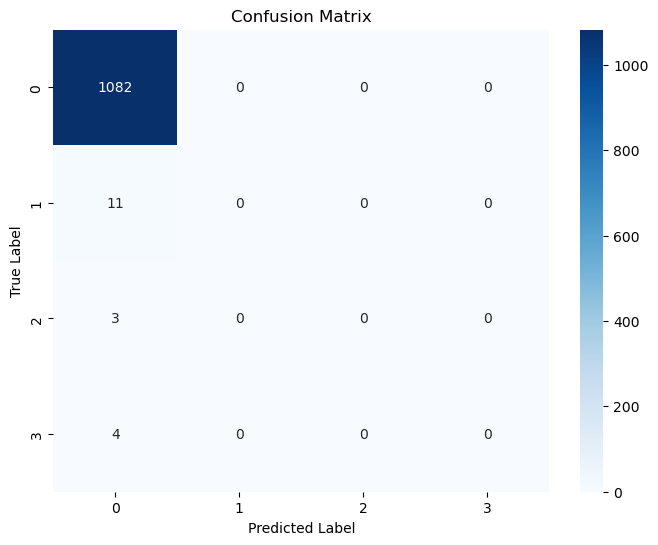

In [28]:
# Assuming y_pred_classes and Y_test are the predicted and true labels, respectively
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Convert predicted probabilities to class predictions
y_pred_classes = np.argmax(y_pred_binary, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [29]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,669 (69.02 KB)

 Trainable params: 5,889 (23.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,780 (46.02 KB)

In [30]:
decoded_list = [key for key, value in my_dic.items() if value in converted_list]

In [31]:
for prediction in predictions:
    if int(prediction) >5:
        print(int(prediction))

C:\Users\Toqa\AppData\Local\Temp\ipykernel_15844\2630667227.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(prediction) >5:


In [32]:
decoded_predictions = [list(my_dic.keys())[list(my_dic.values()).index(int(idx))] for idx in predictions]

C:\Users\Toqa\AppData\Local\Temp\ipykernel_15844\2050246687.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  decoded_predictions = [list(my_dic.keys())[list(my_dic.values()).index(int(idx))] for idx in predictions]


In [33]:
Y_valid_decode = [list(my_dic.keys())[list(my_dic.values()).index(y)] for y in Y_valid]

In [34]:
Accuracy = 0;
for i in range (len(decoded_predictions)):
    if decoded_predictions[i] == Y_valid_decode[i]:
        Accuracy +=1
        
Acc_percentage = Accuracy/len(decoded_predictions) * 100

print("Accuracy : " + str(Acc_percentage) + "%")

Accuracy : 98.54677565849228%
